# Básico

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, chi2_contingency, shapiro, cramervonmises, anderson, kstest
from scipy.optimize import curve_fit
from statsmodels.stats.diagnostic import lilliefors


In [3]:
df = pd.read_csv("/home/guiduarte/Documents/01-FaculdadeSemestreAtual/Projeto Integrador V/temperatura_maxima_bsb.csv", sep=';')

In [4]:
df.head()

,Data Medicao,TEMPERATURA MAXIMA DIARIA(°C),Unnamed: 2
0,1980-01-01,22.4,NaN
1,1980-01-02,24.0,NaN
2,1980-01-03,24.8,NaN
3,1980-01-04,28.5,NaN
4,1980-01-05,27.5,NaN


In [5]:
df.rename({"Data Medicao":"Data", "TEMPERATURA MAXIMA DIARIA(°C)":"Temp"}, axis=1, inplace=True)

In [6]:
df.drop('Unnamed: 2', axis=1, inplace=True)

In [7]:
df['Data'] = pd.to_datetime(df['Data'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    16071 non-null  datetime64[ns]
 1   Temp    16037 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 251.2 KB


In [9]:
df.describe()

,Data,Temp
count,16071,16037.000000
mean,2001-12-31 00:00:00,26.919667
min,1980-01-01 00:00:00,15.000000
25%,1990-12-31 12:00:00,25.400000
50%,2001-12-31 00:00:00,26.900000
75%,2012-12-30 12:00:00,28.400000
max,2023-12-31 00:00:00,36.400000
std,NaN,2.465063


In [10]:
df[df.isnull().any(axis=1)]

,Data,Temp
1180,1983-03-26,NaN
1385,1983-10-17,NaN
2523,1986-11-28,NaN
2930,1988-01-09,NaN
2931,1988-01-10,NaN
2956,1988-02-04,NaN
3226,1988-10-31,NaN
3454,1989-06-16,NaN
3455,1989-06-17,NaN
3456,1989-06-18,NaN


In [11]:
for index, row in df.iterrows():
    if pd.isna(row['Temp']):
        # Calculando a média dos dias anterior e posterior
        media = df.iloc[index - 1:index + 2]['Temp'].mean() # type: ignore

        # Imprimindo as linhas anterior e posterior
        print("Linha anterior:")
        print(df.iloc[index - 1]) # type: ignore
        print('\nLinha atual')
        print(media)
        print("\nLinha posterior:")
        print(df.iloc[index + 1]) # type: ignore
        print("\n")
        print('------------------------------')
        print('\n')

        # Preenchendo o valor na linha atual com a média calculada
        df.at[index, 'Temp'] = media

# Exibindo o DataFrame após o preenchimento
print(df)


Linha anterior:
Data    1983-03-25 00:00:00
Temp                   23.6
Name: 1179, dtype: object

Linha atual
23.5

Linha posterior:
Data    1983-03-27 00:00:00
Temp                   23.4
Name: 1181, dtype: object


------------------------------


Linha anterior:
Data    1983-10-16 00:00:00
Temp                   28.8
Name: 1384, dtype: object

Linha atual
28.3

Linha posterior:
Data    1983-10-18 00:00:00
Temp                   27.8
Name: 1386, dtype: object


------------------------------


Linha anterior:
Data    1986-11-27 00:00:00
Temp                   31.4
Name: 2522, dtype: object

Linha atual
28.7

Linha posterior:
Data    1986-11-29 00:00:00
Temp                   26.0
Name: 2524, dtype: object


------------------------------


Linha anterior:
Data    1988-01-08 00:00:00
Temp                   28.6
Name: 2929, dtype: object

Linha atual
28.6

Linha posterior:
Data    1988-01-10 00:00:00
Temp                    NaN
Name: 2931, dtype: object


-----------------------------

In [12]:
df.shape

(16071, 2)

In [13]:
df.describe()

,Data,Temp
count,16071,16071.000000
mean,2001-12-31 00:00:00,26.921794
min,1980-01-01 00:00:00,15.000000
25%,1990-12-31 12:00:00,25.400000
50%,2001-12-31 00:00:00,26.900000
75%,2012-12-30 12:00:00,28.400000
max,2023-12-31 00:00:00,36.400000
std,NaN,2.466117


In [14]:
df.head()

,Data,Temp
0,1980-01-01,22.4
1,1980-01-02,24.0
2,1980-01-03,24.8
3,1980-01-04,28.5
4,1980-01-05,27.5


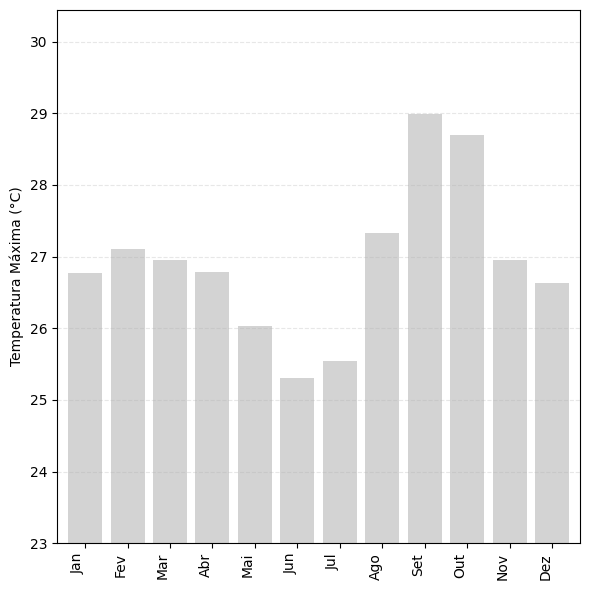

In [15]:
df['Mes'] = df['Data'].dt.month
monthly_avg_temp = df.groupby('Mes')['Temp'].mean()

plt.figure(figsize=(6, 6))
bar_width = 0.8
monthly_avg_temp.plot(kind='bar', color='lightgrey', width=bar_width)
plt.xlabel('')
plt.ylabel('Temperatura Máxima (°C)')

meses_abreviados = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(range(12), meses_abreviados, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(23, None)

plt.tight_layout()
plt.show()

# Funções Densidade Probabilidade

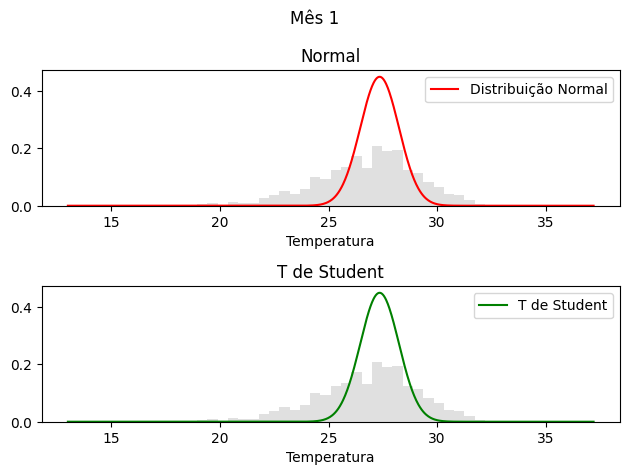

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


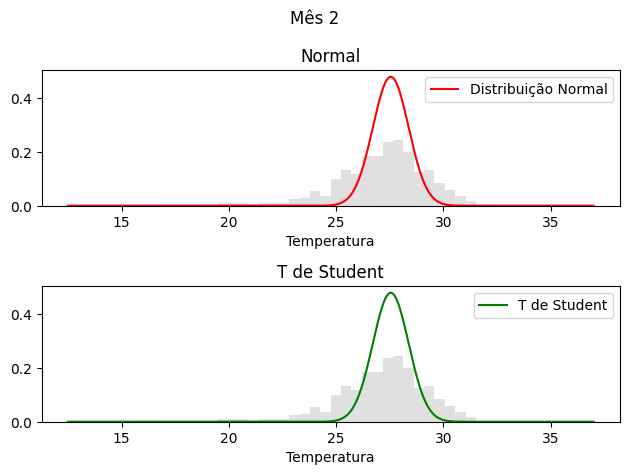

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


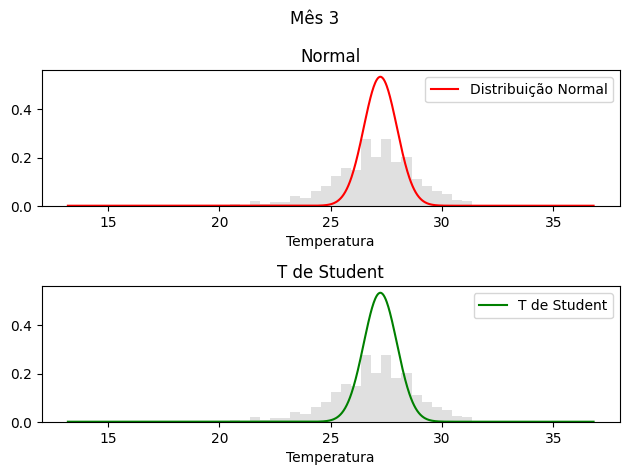

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


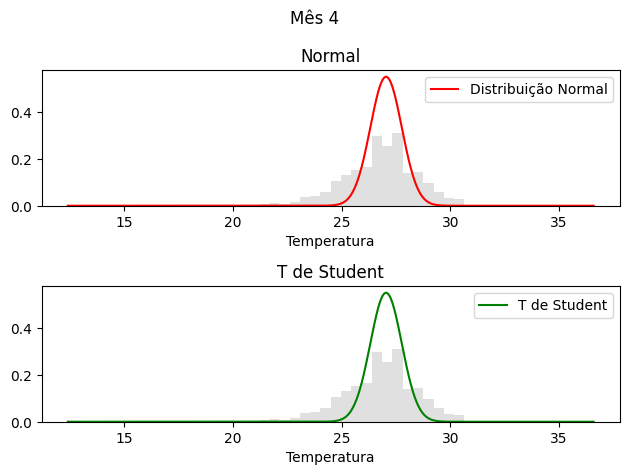

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


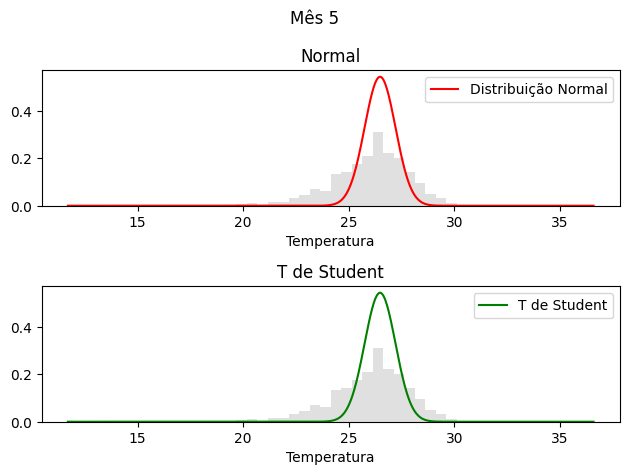

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


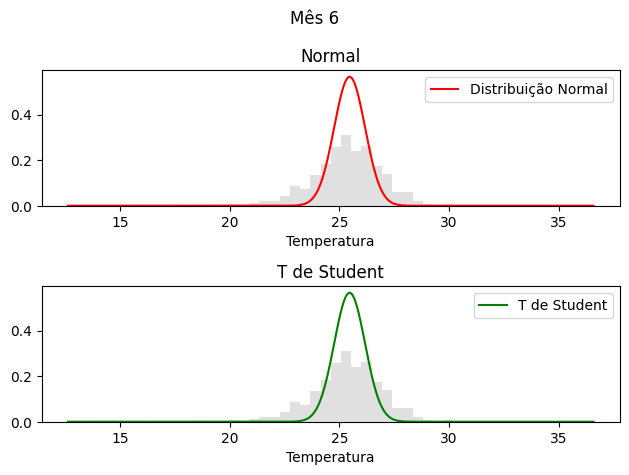

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


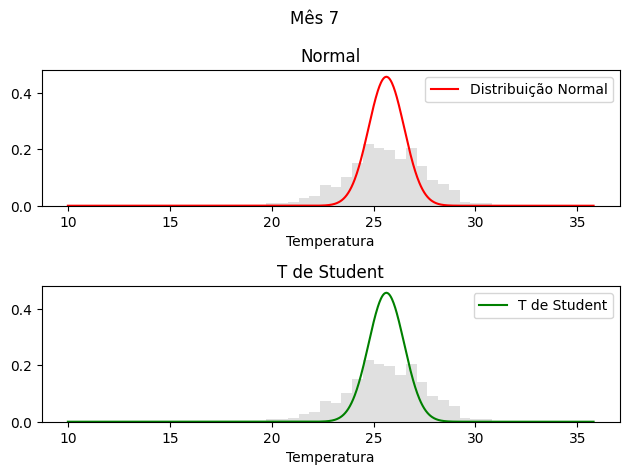

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


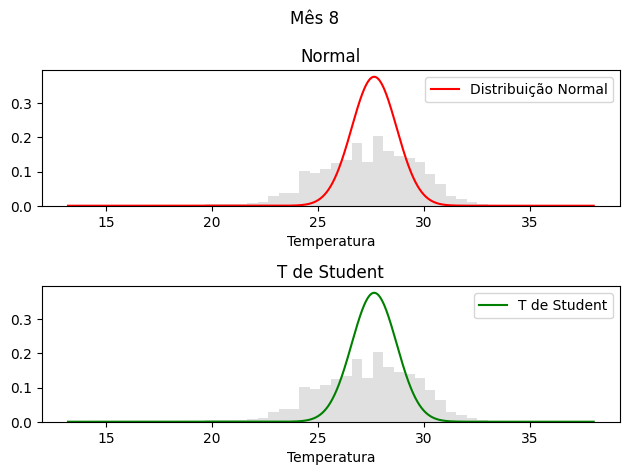

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


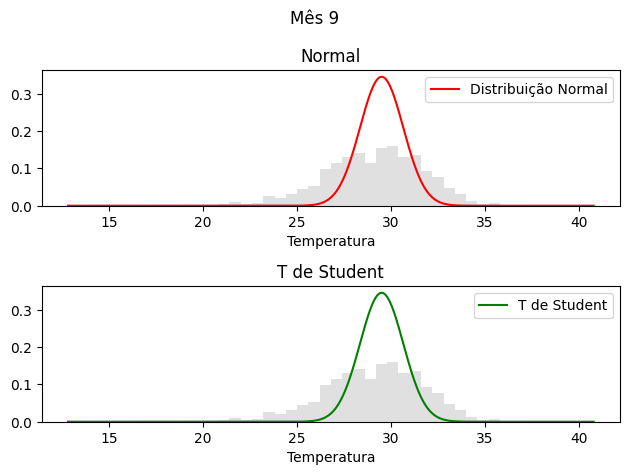

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


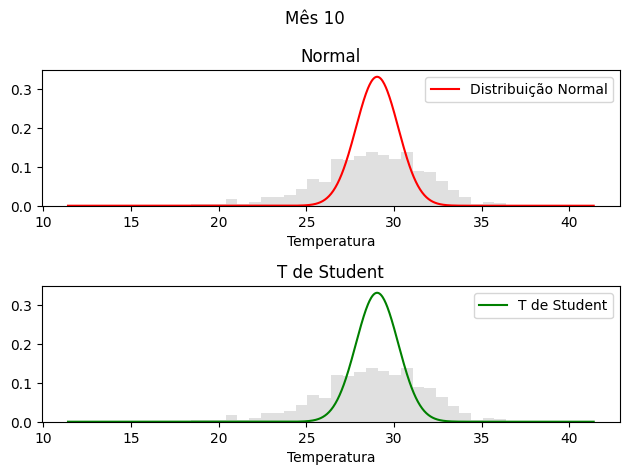

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


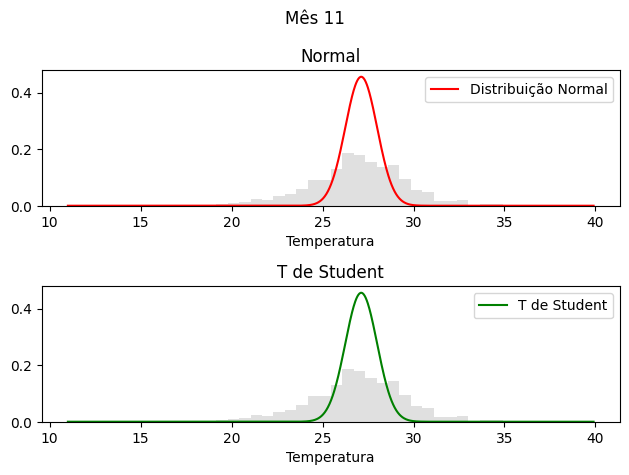

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


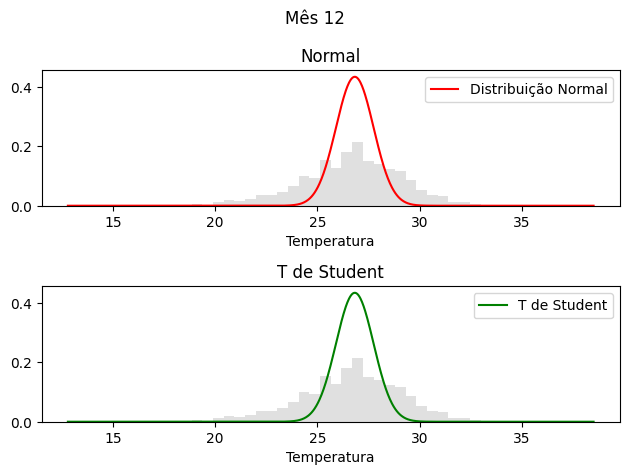

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


In [16]:
df['Mes'] = df['Data'].dt.month

for mes in range(1, 13):
    temperaturas_mes = df[df['Mes'] == mes]['Temp']

    # Função de densidade de probabilidade da distribuição t de Student
    def t_pdf(x, df, loc, scale):
        return t.pdf(x, df, loc=loc, scale=scale)

    # Estimativa inicial dos parâmetros para o ajuste
    guess = (len(temperaturas_mes) - 1, temperaturas_mes.mean(), temperaturas_mes.std())

    # Ajuste dos parâmetros da distribuição t de Student aos dados
    params, _ = curve_fit(t_pdf, temperaturas_mes, np.zeros_like(temperaturas_mes) + 1, p0=guess)
    graus_liberdade, media, desvio_padrao = params

    # Definição dos limites para o eixo x
    min_x = temperaturas_mes.min() - 5
    max_x = temperaturas_mes.max() + 5
    x = np.linspace(min_x, max_x, 1000)

    # Cálculo das densidades de probabilidade para a distribuição normal e a distribuição t de Student
    pdf_normal = norm.pdf(x, media, desvio_padrao)
    pdf_t = t.pdf(x, graus_liberdade, loc=media, scale=desvio_padrao)

    # Plotagem dos histogramas e das distribuições
    fig, axs = plt.subplots(2)
    fig.suptitle(f'Mês {mes}')

    axs[0].hist(temperaturas_mes, bins=30, density=True, alpha=0.7, color='lightgrey')
    axs[0].plot(x, pdf_normal, 'r-', label='Distribuição Normal')
    axs[0].set_title('Normal')
    axs[0].set_xlabel('Temperatura')
    axs[0].legend()

    axs[1].hist(temperaturas_mes, bins=30, density=True, alpha=0.7, color='lightgrey')
    axs[1].plot(x, pdf_t, 'g-', label='T de Student')
    axs[1].set_title('T de Student')
    axs[1].set_xlabel('Temperatura')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")


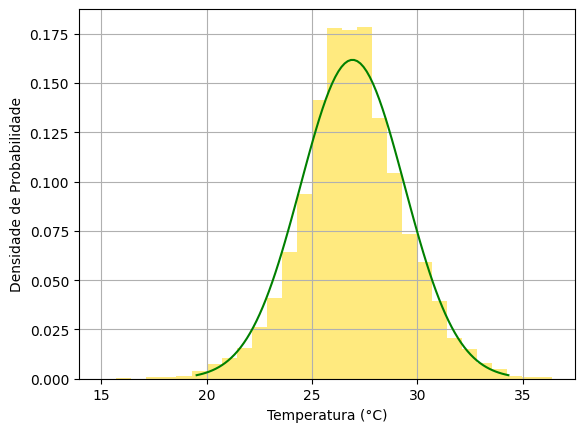

In [17]:
temperaturas = df.Temp

# Calcular média e desvio padrão
mu = np.mean(temperaturas)
sigma = np.std(temperaturas)

# Gerar valores para o eixo x
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Calcular os valores da distribuição normal para os valores de x
y = norm.pdf(x, mu, sigma)

# Plotar a curva normal
plt.plot(x, y, color='green')

# Plotar o histograma das temperaturas reais
plt.hist(temperaturas, bins=30, density=True, alpha=0.5, color='gold')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True)
plt.show()

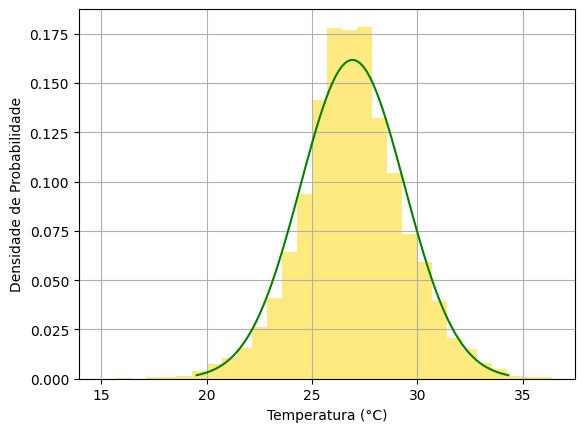

In [18]:
temperaturas = df.Temp

# Graus de liberdade para a distribuição t (número de observações - 1)
graus_de_liberdade = len(temperaturas) - 1


# Calcular média e desvio padrão
mu = np.mean(temperaturas)
sigma = np.std(temperaturas)

# Gerar valores para o eixo x
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Calcular os valores da distribuição t de Student para os valores de x
y = t.pdf(x, graus_de_liberdade, mu, sigma)

# Plotar a curva t de Student
plt.plot(x, y, color='green')

# Plotar o histograma das temperaturas reais
plt.hist(temperaturas, bins=30, density=True, alpha=0.5, color='gold')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True)
plt.show()

# Testes de Aderencia

### Backup

In [19]:
"""
from calendar import month_abbr
from tabulate import tabulate

# Função para realizar os testes de aderência
def realizar_testes(dados, dist):
    resultados = {}
    if dist == 'normal':
        # Testes específicos para a distribuição normal
        resultados['Shapiro-Wilk'] = stats.shapiro(dados)[1]
        resultados['Kolmogorov-Smirnov'] = stats.kstest(dados, 'norm', args=(dados.mean(), dados.std()))[1]
        resultados['Lilliefors'] = lilliefors(dados)[1]
        ad_result = stats.anderson(dados, dist='norm')
        resultados['Anderson-Darling'] = ad_result.statistic  # type: ignore #
        cvm_result = stats.cramervonmises(dados, 'norm')
        resultados['Cramer-von Mises'] = cvm_result.pvalue
    elif dist == 't':
        # Testes específicos para a distribuição t de Student
        df = len(dados) - 1  # graus de liberdade
        resultados['Kolmogorov-Smirnov'] = stats.kstest(dados, 't', args=(df, dados.mean(), dados.std()))[1]
        ad_result = stats.anderson(dados, dist='norm')
        resultados['Anderson-Darling'] = ad_result.statistic  # type: ignore 
        resultados['Qui-quadrado'] = stats.chisquare(dados)[1]
        cvm_result = stats.cramervonmises(dados, 'norm')
        resultados['Cramer-von Mises'] = cvm_result.pvalue
    
    return resultados

# Preenchendo as tabelas com os resultados dos testes para os dados fornecidos
def preencher_tabelas(df):
    tabelas = {'Normal': {}, 'T': {}}
    meses = df['Mes'].unique()
    for mes in meses:
        dados_mes = df[df['Mes'] == mes]['Temp']
        resultados_normal = realizar_testes(dados_mes, 'normal')
        resultados_t = realizar_testes(dados_mes, 't')
        tabelas['Normal'][mes] = resultados_normal
        tabelas['T'][mes] = resultados_t
    return tabelas

def imprimir_tabelas(tabelas):
    for distribuicao, tabela_distribuicao in tabelas.items():
        print(f"Tabela para a distribuição {distribuicao}")
        headers = ["Mês", "Teste", "P value", "Conclusão"]
        tabela = []
        for mes, resultados in tabela_distribuicao.items():
            for teste, p_valor in resultados.items():
                conclusao = "Rejeitar H0" if p_valor < 0.05 else "Aceitar H0"
                tabela.append([mes, teste, f"{p_valor:}", conclusao])
        print(tabulate(tabela, headers, tablefmt="grid"))



# Executando o código com o DataFrame
tabelas_resultados = preencher_tabelas(df)
imprimir_tabelas(tabelas_resultados)
"""

'\nfrom calendar import month_abbr\nfrom tabulate import tabulate\n\n# Função para realizar os testes de aderência\ndef realizar_testes(dados, dist):\n    resultados = {}\n    if dist == \'normal\':\n        # Testes específicos para a distribuição normal\n        resultados[\'Shapiro-Wilk\'] = stats.shapiro(dados)[1]\n        resultados[\'Kolmogorov-Smirnov\'] = stats.kstest(dados, \'norm\', args=(dados.mean(), dados.std()))[1]\n        resultados[\'Lilliefors\'] = lilliefors(dados)[1]\n        ad_result = stats.anderson(dados, dist=\'norm\')\n        resultados[\'Anderson-Darling\'] = ad_result.statistic  # type: ignore #\n        cvm_result = stats.cramervonmises(dados, \'norm\')\n        resultados[\'Cramer-von Mises\'] = cvm_result.pvalue\n    elif dist == \'t\':\n        # Testes específicos para a distribuição t de Student\n        df = len(dados) - 1  # graus de liberdade\n        resultados[\'Kolmogorov-Smirnov\'] = stats.kstest(dados, \'t\', args=(df, dados.mean(), dados.std(

## Shapiro

In [20]:
results_shap = []

# Iterar sobre cada mês único no dataframe
for mes in df['Mes'].unique():
    # Filtrar o dataframe para o mês atual
    data_mes = df[df['Mes'] == mes]['Temp']
    
    # Realizar o teste de Shapiro-Wilk
    stat, p_value = shapiro(data_mes)
    
    # Determinar se a hipótese nula é rejeitada
    reject_null = p_value < 0.05
    
    # Adicionar os resultados à lista
    results_shap.append({
        'Mes': mes,
        'Distribuição': 'Normal',
        'P Value': p_value,
        'Rejeita H0': reject_null
    })

# Teste para todos os meses juntos
data_all = df['Temp']

# Realizar o teste de Shapiro-Wilk
stat_all, p_value_all = shapiro(data_all)

# Determinar se a hipótese nula é rejeitada
reject_null_all = p_value_all < 0.05

# Adicionar os resultados à lista
results_shap.append({
    'Mes': 'Todos',
    'Distribuição': 'Normal',
    'P Value': p_value_all,
    'Rejeita H0': reject_null_all
})

# Criar um dataframe com os resultados
results_df = pd.DataFrame(results_shap)

# Mostrar o dataframe com os resultados
print(results_df)

results_df.to_csv('results_shap_df.csv', index=False)


      Mes Distribuição       P Value  Rejeita H0
0       1       Normal  8.226594e-11        True
1       2       Normal  1.970185e-18        True
2       3       Normal  2.644924e-12        True
3       4       Normal  2.960211e-10        True
4       5       Normal  1.430610e-14        True
5       6       Normal  1.628760e-14        True
6       7       Normal  2.697196e-11        True
7       8       Normal  9.577766e-07        True
8       9       Normal  8.054686e-10        True
9      10       Normal  2.989516e-09        True
10     11       Normal  3.047141e-07        True
11     12       Normal  5.011134e-07        True
12  Todos       Normal  6.523380e-22        True


/var/data/python/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16071.
  res = hypotest_fun_out(*samples, **kwds)


## Kolmogorov-Smirnov

In [21]:
results_ks = []

# Iterar sobre cada mês único no dataframe
for mes in df['Mes'].unique():
    # Filtrar o dataframe para o mês atual
    data_mes = df[df['Mes'] == mes]['Temp']
    
    # Realizar o teste de Kolmogorov-Smirnov
    stat, p_value = kstest(data_mes, 'norm', args=(data_mes.mean(), data_mes.std()))
    
    # Determinar se a hipótese nula é rejeitada
    reject_null = p_value < 0.05
    
    # Adicionar os resultados à lista
    results_ks.append({
        'Mes': mes,
        'Distribuição': 'Normal',
        'P Value': p_value,
        'Rejeita H0': reject_null
    })

# Teste para todos os meses juntos
data_all = df['Temp']
stat_all, p_value_all = kstest(data_all, 'norm', args=(data_all.mean(), data_all.std()))
reject_null_all = p_value_all < 0.05
results_ks.append({
    'Mes': 'Todos',
    'Distribuição': 'Normal',
    'P Value': p_value_all,
    'Rejeita H0': reject_null_all
})

# Criar um dataframe com os resultados
results_ks_df = pd.DataFrame(results_ks)

# Mostrar o dataframe com os resultados
print(results_ks_df)

results_ks_df.to_csv('results_ks_df.csv', index=False)

      Mes Distribuição       P Value  Rejeita H0
0       1       Normal  5.419786e-04        True
1       2       Normal  5.508825e-05        True
2       3       Normal  7.577754e-05        True
3       4       Normal  1.249783e-04        True
4       5       Normal  1.546336e-06        True
5       6       Normal  1.117021e-04        True
6       7       Normal  1.600645e-02        True
7       8       Normal  2.066939e-02        True
8       9       Normal  9.971227e-03        True
9      10       Normal  9.300328e-02       False
10     11       Normal  7.760572e-04        True
11     12       Normal  1.445287e-02        True
12  Todos       Normal  4.912841e-15        True


In [22]:
results_ks_t = []

# Iterar sobre cada mês único no dataframe
for mes in df['Mes'].unique():
    # Filtrar o dataframe para o mês atual
    data_mes = df[df['Mes'] == mes]['Temp']
    
    # Graus de liberdade para a distribuição t
    df_t = len(data_mes) - 1
    
    # Realizar o teste de Kolmogorov-Smirnov
    stat, p_value = kstest(data_mes, 't', args=(df_t, data_mes.mean(), data_mes.std()))
    
    # Determinar se a hipótese nula é rejeitada
    reject_null = p_value < 0.05
    
    # Adicionar os resultados à lista
    results_ks_t.append({
        'Mes': mes,
        'Distribuição': 't',
        'P Value': p_value,
        'Rejeita H0': reject_null
    })

# Teste para todos os meses juntos
data_all = df['Temp']
df_t_all = len(data_all) - 1
stat_all, p_value_all = kstest(data_all, 't', args=(df_t_all, data_all.mean(), data_all.std()))
reject_null_all = p_value_all < 0.05
results_ks_t.append({
    'Mes': 'Todos',
    'Distribuição': 't',
    'P Value': p_value_all,
    'Rejeita H0': reject_null_all
})

# Criar um dataframe com os resultados
results_ks_t_df = pd.DataFrame(results_ks_t)

# Mostrar o dataframe com os resultados
print(results_ks_t_df)

results_ks_t_df.to_csv('results_ks_t_df.csv', index=False)

      Mes Distribuição       P Value  Rejeita H0
0       1            t  5.431368e-04        True
1       2            t  5.514920e-05        True
2       3            t  7.521295e-05        True
3       4            t  1.242845e-04        True
4       5            t  1.540466e-06        True
5       6            t  1.108241e-04        True
6       7            t  1.593169e-02        True
7       8            t  2.071061e-02        True
8       9            t  9.985180e-03        True
9      10            t  9.304812e-02       False
10     11            t  7.731094e-04        True
11     12            t  1.440913e-02        True
12  Todos            t  4.889009e-15        True


## Lilliefors

In [23]:
results_lilliefors = []

# Iterar sobre cada mês único no dataframe
for mes in df['Mes'].unique():
    # Filtrar o dataframe para o mês atual
    data_mes = df[df['Mes'] == mes]['Temp']
    
    # Realizar o teste de Lilliefors
    stat, p_value = lilliefors(data_mes)
    
    # Determinar se a hipótese nula é rejeitada
    reject_null = p_value < 0.05
    
    # Adicionar os resultados à lista
    results_lilliefors.append({
        'Mes': mes,
        'Distribuição': 'Normal',
        'P Value': p_value,
        'Rejeita H0': reject_null
    })

# Teste para todos os meses juntos
stat_all, p_value_all = lilliefors(df['Temp'])
reject_null_all = p_value_all < 0.05
results_lilliefors.append({
    'Mes': 'Todos',
    'Distribuição': 'Normal',
    'P Value': p_value_all,
    'Rejeita H0': reject_null_all
})

# Criar um dataframe com os resultados
results_lilliefors_df = pd.DataFrame(results_lilliefors)

# Mostrar o dataframe com os resultados
print(results_lilliefors_df)

results_lilliefors_df.to_csv('results_lilliefors_df.csv', index=False)

      Mes Distribuição   P Value  Rejeita H0
0       1       Normal  0.001000        True
1       2       Normal  0.001000        True
2       3       Normal  0.001000        True
3       4       Normal  0.001000        True
4       5       Normal  0.001000        True
5       6       Normal  0.001000        True
6       7       Normal  0.001000        True
7       8       Normal  0.001000        True
8       9       Normal  0.001000        True
9      10       Normal  0.002045        True
10     11       Normal  0.001000        True
11     12       Normal  0.001000        True
12  Todos       Normal  0.001000        True


## Anderson-Darling

In [24]:
results_ad = []

# Iterar sobre cada mês único no dataframe
for mes in df['Mes'].unique():
    # Filtrar o dataframe para o mês atual
    data_mes = df[df['Mes'] == mes]['Temp']
    
    # Realizar o teste de Anderson-Darling
    result = anderson(data_mes, dist='norm')
    
    # Verificar se a estatística do teste está além do valor crítico
    reject_null = result.statistic > result.critical_values[2]  # Usando 5% como nível crítico
    
    # Adicionar os resultados à lista
    results_ad.append({
        'Mes': mes,
        'Distribuição': 'Normal',
        'Estatística': result.statistic,
        'Valor Crítico (5%)': result.critical_values[2],
        'Rejeita H0': reject_null
    })

# Teste para todos os meses juntos
result_all = anderson(df['Temp'], dist='norm')
reject_null_all = result_all.statistic > result_all.critical_values[2]
results_ad.append({
    'Mes': 'Todos',
    'Distribuição': 'Normal',
    'Estatística': result_all.statistic,
    'Valor Crítico (5%)': result_all.critical_values[2],
    'Rejeita H0': reject_null_all
})

# Criar um dataframe com os resultados
results_ad_df = pd.DataFrame(results_ad)

# Mostrar o dataframe com os resultados
print(results_ad_df)

results_ad_df.to_csv('results_ad_df.csv', index=False)


      Mes Distribuição  Estatística  Valor Crítico (5%)  Rejeita H0
0       1       Normal     4.630192               0.785        True
1       2       Normal     9.284241               0.784        True
2       3       Normal     5.307849               0.785        True
3       4       Normal     4.005342               0.785        True
4       5       Normal     8.068085               0.785        True
5       6       Normal     6.061675               0.785        True
6       7       Normal     2.735089               0.785        True
7       8       Normal     2.109597               0.785        True
8       9       Normal     3.054842               0.785        True
9      10       Normal     3.078309               0.785        True
10     11       Normal     3.863736               0.785        True
11     12       Normal     2.795877               0.785        True
12  Todos       Normal    20.286053               0.787        True


A biblioteca scipy.stats.anderson não permite o uso da distribuição T

## Qui-Quadrado

In [25]:
# Supondo que df seja o dataframe já existente
significance_level = 0.05
results_chi2 = []

for month in range(1, 13):
    # Filtrar os dados para o mês atual
    df_month = df[df['Mes'] == month]
    
    # Calcular média e desvio padrão
    mean_temp = df_month['Temp'].mean()
    std_temp = df_month['Temp'].std()
    
    # Estimar a distribuição normal para o mês atual
    dist = norm(mean_temp, std_temp)
    
    # Calcular as frequências observadas e esperadas, com bins calculados via Doane
    observed_values, bins = np.histogram(df_month['Temp'], bins='doane')
    expected_values = len(df_month) * np.diff(dist.cdf(bins))

    # Adicionar uma pequena constante para evitar zeros nas frequências esperadas
    small_constant = 1e-10
    expected_values = np.where(expected_values == 0, small_constant, expected_values)

    # Criar a tabela de contingência
    contingency_table = np.array([observed_values, expected_values])

    # Realizar o teste do qui-quadrado
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    # Determinar se a hipótese nula é rejeitada
    reject_null = p_value < significance_level
    
    # Adicionar os resultados à lista
    results_chi2.append({
        'Mes': month,
        'Distribuição': 'Normal',
        'P Value': p_value,
        'Rejeita H0': reject_null
    })

# Teste para todos os meses juntos
data_all = df['Temp']
mean_temp_all = data_all.mean()
std_temp_all = data_all.std()
dist_all = norm(mean_temp_all, std_temp_all)
observed_values_all, bins_all = np.histogram(data_all, bins='doane')
expected_values_all = len(data_all) * np.diff(dist_all.cdf(bins_all))
expected_values_all = np.where(expected_values_all == 0, small_constant, expected_values_all)
contingency_table_all = np.array([observed_values_all, expected_values_all])
chi2_stat_all, p_value_all, _, _ = chi2_contingency(contingency_table_all)
reject_null_all = p_value_all < significance_level
results_chi2.append({
    'Mes': 'Todos',
    'Distribuição': 'Normal',
    'P Value': p_value_all,
    'Rejeita H0': reject_null_all
})

# Criar um dataframe com os resultados
results_chi2_df = pd.DataFrame(results_chi2)

# Mostrar o dataframe com os resultados
print(results_chi2_df)

results_chi2_df.to_csv('results_chi2_df.csv', index=False)

      Mes Distribuição       P Value  Rejeita H0
0       1       Normal  6.298369e-02       False
1       2       Normal  4.032742e-05        True
2       3       Normal  7.020959e-03        True
3       4       Normal  3.220059e-02        True
4       5       Normal  2.000132e-04        True
5       6       Normal  5.605123e-04        True
6       7       Normal  1.925800e-01       False
7       8       Normal  5.367305e-01       False
8       9       Normal  9.634010e-02       False
9      10       Normal  1.323598e-01       False
10     11       Normal  7.477553e-02       False
11     12       Normal  1.074691e-01       False
12  Todos       Normal  3.146343e-18        True


In [26]:
results_chi2_t = []

# Definir os bins para a distribuição t esperada
bins = 10
small_constant = 1e-10

# Função para gerar dados da distribuição t
def generate_t_samples(size, df, loc, scale):
    return t.rvs(df, loc=loc, scale=scale, size=size)

# Iterar sobre cada mês único no dataframe
for mes in df['Mes'].unique():
    # Filtrar o dataframe para o mês atual
    data_mes = df[df['Mes'] == mes]['Temp']
    
    # Graus de liberdade para a distribuição t
    df_t = len(data_mes) - 1
    
    # Gerar amostras da distribuição t
    t_samples = generate_t_samples(len(data_mes), df_t, data_mes.mean(), data_mes.std())
    
    # Calcular os valores esperados para uma distribuição t
    expected_freq, bin_edges = np.histogram(t_samples, bins=bins, density=True)
    expected_freq *= len(data_mes) * np.diff(bin_edges)
    
    # Calcular os valores observados
    observed_freq, _ = np.histogram(data_mes, bins=bin_edges)
    
    # Adicionar uma pequena constante para evitar zeros nas frequências esperadas
    expected_freq = np.where(expected_freq == 0, small_constant, expected_freq)
    
    # Criar a tabela de contingência
    contingency_table = np.vstack([observed_freq, expected_freq]).T
    
    # Realizar o teste de Qui-Quadrado usando chi2_contingency
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Determinar se a hipótese nula é rejeitada
    reject_null = p_value < 0.05
    
    # Adicionar os resultados à lista
    results_chi2_t.append({
        'Mes': mes,
        'Distribuição': 't',
        'P Value': p_value,
        'Rejeita H0': reject_null
    })

# Teste para todos os meses juntos
data_all = df['Temp']
df_t_all = len(data_all) - 1
t_samples_all = generate_t_samples(len(data_all), df_t_all, data_all.mean(), data_all.std())
expected_freq_all, bin_edges_all = np.histogram(t_samples_all, bins=bins, density=True)
expected_freq_all *= len(data_all) * np.diff(bin_edges_all)
observed_freq_all, _ = np.histogram(data_all, bins=bin_edges_all)
expected_freq_all = np.where(expected_freq_all == 0, small_constant, expected_freq_all)
contingency_table_all = np.vstack([observed_freq_all, expected_freq_all]).T
chi2_stat_all, p_value_all, dof_all, expected_all = chi2_contingency(contingency_table_all)
reject_null_all = p_value_all < 0.05
results_chi2_t.append({
    'Mes': 'Todos',
    'Distribuição': 't',
    'P Value': p_value_all,
    'Rejeita H0': reject_null_all
})

# Criar um dataframe com os resultados
results_chi2_t_df = pd.DataFrame(results_chi2_t)

# Mostrar o dataframe com os resultados
print(results_chi2_t_df)

results_chi2_t_df.to_csv('results_chi2_t_df.csv', index=False)

      Mes Distribuição       P Value  Rejeita H0
0       1            t  2.097469e-04        True
1       2            t  9.100953e-04        True
2       3            t  3.171969e-03        True
3       4            t  4.719038e-03        True
4       5            t  6.548719e-08        True
5       6            t  5.336488e-02       False
6       7            t  4.986259e-02        True
7       8            t  3.047720e-03        True
8       9            t  1.218940e-02        True
9      10            t  8.366232e-04        True
10     11            t  4.641690e-02        True
11     12            t  1.701906e-03        True
12  Todos            t  2.376623e-28        True


## Crames-von Mises

In [27]:
results_cvm = []

# Iterar sobre cada mês único no dataframe
for mes in df['Mes'].unique():
    # Filtrar o dataframe para o mês atual
    data_mes = df[df['Mes'] == mes]['Temp']
    
    # Realizar o teste de Cramer-von Mises
    result = cramervonmises(data_mes, 'norm', (data_mes.mean(), data_mes.std()))
    
    # Determinar se a hipótese nula é rejeitada
    reject_null = result.pvalue < 0.05
    
    # Adicionar os resultados à lista
    results_cvm.append({
        'Mes': mes,
        'Distribuição': 'Normal',
        'P Value': result.pvalue,
        'Rejeita H0': reject_null
    })

# Teste para todos os meses juntos
result_all = cramervonmises(df['Temp'], 'norm', (df['Temp'].mean(), df['Temp'].std()))
reject_null_all = result_all.pvalue < 0.05
results_cvm.append({
    'Mes': 'Todos',
    'Distribuição': 'Normal',
    'P Value': result_all.pvalue,
    'Rejeita H0': reject_null_all
})

# Criar um dataframe com os resultados
results_cvm_df = pd.DataFrame(results_cvm)

# Mostrar o dataframe com os resultados
print(results_cvm_df)

results_cvm_df.to_csv('results_cvm_df.csv', index=False)

      Mes Distribuição       P Value  Rejeita H0
0       1       Normal  7.606708e-03        True
1       2       Normal  2.985271e-04        True
2       3       Normal  4.086604e-03        True
3       4       Normal  1.078675e-02        True
4       5       Normal  2.708857e-04        True
5       6       Normal  2.600362e-03        True
6       7       Normal  7.357905e-02       False
7       8       Normal  1.166369e-01       False
8       9       Normal  5.259004e-02       False
9      10       Normal  6.928171e-02       False
10     11       Normal  1.478021e-02        True
11     12       Normal  6.056265e-02       False
12  Todos       Normal  1.022551e-08        True


In [28]:
# Inicializando uma lista para armazenar os resultados
results_cvm_t = []

# Iterar sobre cada mês único no dataframe
for mes in df['Mes'].unique():
    # Filtrar o dataframe para o mês atual
    data_mes = df[df['Mes'] == mes]['Temp']
    
    # Realizar o teste de Cramer-von Mises para distribuição t
    result = cramervonmises(data_mes, 't', (data_mes.mean(), data_mes.std(), len(data_mes)-1))
    
    # Determinar se a hipótese nula é rejeitada
    reject_null = result.pvalue < 0.05
    
    # Adicionar os resultados à lista
    results_cvm_t.append({
        'Mes': mes,
        'Distribuição': 't',
        'P Value': result.pvalue,
        'Rejeita H0': reject_null
    })

# Teste para todos os meses juntos
result_all = cramervonmises(df['Temp'], 't', (df['Temp'].mean(), df['Temp'].std(), len(df['Temp'])-1))
reject_null_all = result_all.pvalue < 0.05
results_cvm_t.append({
    'Mes': 'Todos',
    'Distribuição': 't',
    'P Value': result_all.pvalue,
    'Rejeita H0': reject_null_all
})

# Criar um dataframe com os resultados
results_cvm_t_df = pd.DataFrame(results_cvm_t)

# Mostrar o dataframe com os resultados
print(results_cvm_t_df)

results_cvm_t_df.to_csv('results_cvm_t_df.csv', index=False)

      Mes Distribuição       P Value  Rejeita H0
0       1            t  5.087121e-08        True
1       2            t  4.047244e-08        True
2       3            t  5.153806e-08        True
3       4            t  3.285371e-08        True
4       5            t  5.158469e-08        True
5       6            t  3.288851e-08        True
6       7            t  5.130038e-08        True
7       8            t  5.093903e-08        True
8       9            t  3.198081e-08        True
9      10            t  5.000151e-08        True
10     11            t  3.201072e-08        True
11     12            t  5.068528e-08        True
12  Todos            t  2.380046e-07        True


In [29]:
# Função para combinar arquivos CSV de uma lista e salvar como um único arquivo CSV
def combinar_csv(arquivos_csv, arquivo_saida):
    # Inicializar uma lista para armazenar os DataFrames
    dataframes = []
    
    # Ler cada arquivo CSV e adicionar à lista de DataFrames
    for arquivo in arquivos_csv:
        df = pd.read_csv(arquivo)
        dataframes.append(df)
    
    # Concatenar todos os DataFrames em um único DataFrame
    df_combinado = pd.concat(dataframes, ignore_index=True)
    
    # Exportar o DataFrame combinado para um novo arquivo CSV
    df_combinado.to_csv(arquivo_saida, index=False)
    print(f"Dados combinados exportados com sucesso para '{arquivo_saida}'")

# Listas de arquivos CSV
arquivos_qui2 = ['results_chi2_df.csv', 'results_chi2_t_df.csv']
arquivos_cvm = ['results_cvm_df.csv', 'results_cvm_t_df.csv']
arquivos_ks = ['results_ks_df.csv', 'results_ks_t_df.csv']

# Combinar arquivos de cada lista e salvar como novos arquivos CSV
combinar_csv(arquivos_qui2, 'dados_combinados_qui2.csv')
combinar_csv(arquivos_cvm, 'dados_combinados_cvm.csv')
combinar_csv(arquivos_ks, 'dados_combinados_ks.csv')

Dados combinados exportados com sucesso para 'dados_combinados_qui2.csv'
Dados combinados exportados com sucesso para 'dados_combinados_cvm.csv'
Dados combinados exportados com sucesso para 'dados_combinados_ks.csv'


media, variancia, kurstisis (achatamento da curva), simetria do mes que deu certo e estudar essa distribuição naquele mes 

Média do mês 10: 28.692228739002932
Variância do mês 10: 8.97110243920281
Curtose do mês 10: 0.40644842752523447
Simetria do mês 10: -0.44791446334662216


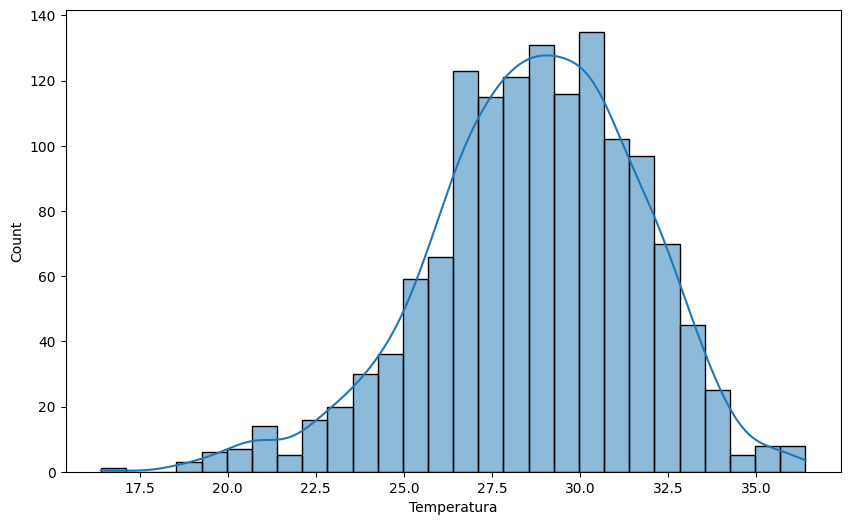

In [33]:
from scipy import stats

# Selecionando os dados do mês 10
dados_mes_10 = df[df['Mes'] == 10]['Temp']

# Calculando estatísticas descritivas
media = dados_mes_10.mean()
variancia = dados_mes_10.var()
curtose = stats.kurtosis(dados_mes_10)
simetria = stats.skew(dados_mes_10)

# Imprimindo os resultados
print(f"Média do mês 10: {media}")
print(f"Variância do mês 10: {variancia}")
print(f"Curtose do mês 10: {curtose}")
print(f"Simetria do mês 10: {simetria}")

# Plotando a distribuição
plt.figure(figsize=(10, 6))
sns.histplot(dados_mes_10, kde=True)
#plt.title('Distribuição de Temperaturas no Mês 10')
plt.xlabel('Temperatura')
#plt.ylabel('Frequência')
plt.show()
